## Задача о коммивояжере на плоcкости. Динамическое программирование

Задание подготовила: Цициковская Софья, 411 группа

#### Условие задачи

Задача коммивояжёра - задача комбинаторной оптимизации, заключающаяся в поиске самого короткого маршрута, проходящего через указанные города ровно по одному разу с последующим возвратом в исходный город. Существует несколько вариантов общей постановки задачи, в частности, задача коммивояжёра на плоскости - это когда матрица расстояний отражает расстояния между точками на плоскости. 

Импортируем необходимые библиотеки:

In [19]:
import math
import random
import matplotlib.pyplot as plt
from IPython.display import Image, display

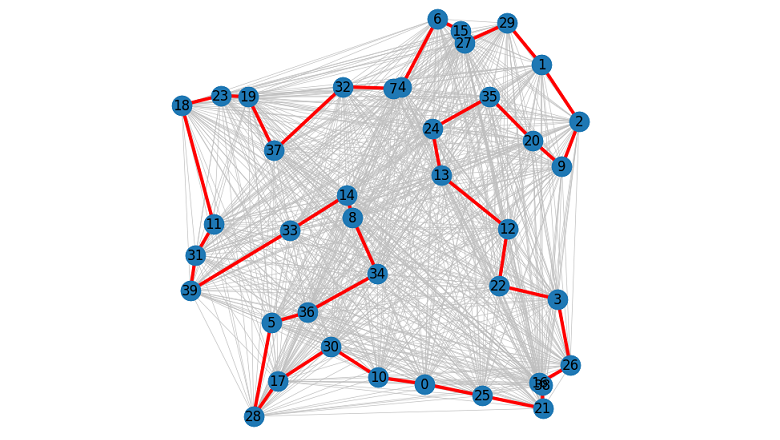

In [20]:
display(Image("c.png"))

#### Динамическое программирование

Есть несколько (n) городов на карте. Нужно: выехать из города 0, объехать все остальные города ровно один раз, вернуться обратно в город 0, и при этом путь должен быть как можно короче (по евклидовой метрике). Используем метод динамического программирования: вместо перебора всех возможных маршрутов будем строить путь по частям и запоминать решения. Пусть мы уже посетили какой-то набор городов, и сейчас находимся в городе j. Тогда минимальный путь до этого состояния можно посчитать, используя минимальный путь до предыдущего города.

#### Генерация тестовых примеров

In [21]:
def gen_dist(coords):
    n = len(coords)
    m = [] # матрица с расстояними из города в город
    for i in range(n):
        row = []
        for j in range(n):
            if i == j:
                row.append(0.0)
            else:
                x1, y1 = coords[i]
                x2, y2 = coords[j]
                d = math.sqrt((x1 - x2)**2 + (y1 - y2)**2) # посчитаем расстояние по евклидовой метрике
                row.append(round(d, 2))
        m.append(row)
    return m

In [22]:
def gen_coords(n, max_x = 10, max_y = 10):
    coords = set()  # чтобы не было одинаковых точек
    while len(coords) < n:
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        coords.add((x, y))
    coords = list(coords)

    for i, (x, y) in enumerate(coords):
        print("Координаты города", i, ":", (x, y))

    return coords

In [23]:
coords = gen_coords(5, 10, 10)

print("\n")
print(coords)
print("\n")

matrix = gen_dist(coords)

for row in matrix:
    print(row)

Координаты города 0 : (7, 7)
Координаты города 1 : (7, 10)
Координаты города 2 : (3, 0)
Координаты города 3 : (1, 7)
Координаты города 4 : (1, 0)


[(7, 7), (7, 10), (3, 0), (1, 7), (1, 0)]


[0.0, 3.0, 8.06, 6.0, 9.22]
[3.0, 0.0, 10.77, 6.71, 11.66]
[8.06, 10.77, 0.0, 7.28, 2.0]
[6.0, 6.71, 7.28, 0.0, 7.0]
[9.22, 11.66, 2.0, 7.0, 0.0]


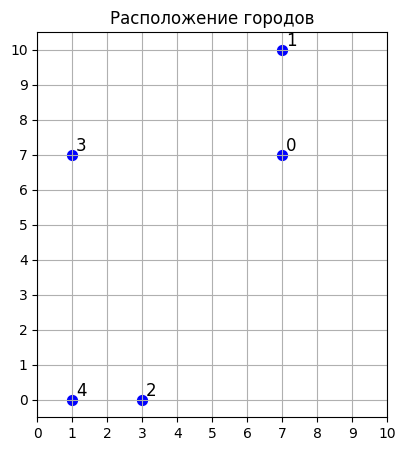

In [24]:
plt.figure(figsize=(5, 5))
for i, (x, y) in enumerate(coords):
    plt.scatter(x, y, c="blue", s=50)
    plt.text(x + 0.1, y + 0.1, str(i), fontsize=12)

plt.title("Расположение городов")

plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 11, 1))

plt.gca().set_aspect('equal', adjustable='box')

plt.grid(True)
plt.show()

#### Реализация алгоритма

In [25]:
def init_dp(n, d):
    dp = {} # dp[(mask, j)] - это минимальная длина пути до города j с подмножеством mask
    par = {} # par[(mask, j)] - это откуда мы пришли в город j

    for j in range(1, n):
        mask = 1 << j
        dp[(mask, j)] = d[0][j] # начинаем путь из города 0
        par[(mask, j)] = 0

    return dp, par

In [26]:
def fill_dp(n, d, dp, par):
    for mask in range(1, 1 << n): # перебираем все подмножества городов, используя маски
        for j in range(1, n):  
            if mask & (1 << j): 
                prev = mask ^ (1 << j)
                if prev == 0:
                    continue

                best = math.inf
                best_k = -1

                for k in range(1, n):
                    if prev & (1 << k):
                        if (prev, k) in dp:
                            cost = dp[(prev, k)] + d[k][j]
                            if cost < best:
                                best = cost
                                best_k = k

                if best < math.inf:
                    dp[(mask, j)] = best
                    par[(mask, j)] = best_k
    return dp, par

In [27]:
def finish(n, d, dp, par):
    full = (1 << n) - 1  # все города
    best = math.inf
    last = -1

    for j in range(1, n):     # возвращаемся в город 0
        if (full ^ 1, j) in dp:
            cost = dp[(full ^ 1, j)] + d[j][0]
            if cost < best:
                best = cost
                last = j

    path = [0]     # восстанавливаем итоговый путь
    mask = full ^ 1
    j = last
    while j != 0 and j != -1:
        path.append(j)
        prev_j = par[(mask, j)]
        mask = mask ^ (1 << j)
        j = prev_j
    path.append(0)
    path.reverse()

    return best, path

In [28]:
def tsp(d):  # основная функция (travelling salesman problem)
    n = len(d)
    dp, par = init_dp(n, d)
    dp, par = fill_dp(n, d, dp, par)
    best, path = finish(n, d, dp, par)
    return best, path

In [29]:
best, path = tsp(matrix)

print("Минимальная длина пути:", round(best, 2))
print("Путь:", path)

Минимальная длина пути: 26.77
Путь: [0, 2, 4, 3, 1, 0]
